# Polynomial Regression 
p330

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# 다항식으로 변환된 단항식 생성, [[0, 1], [2, 3]]의 2x2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature: \n', X)

# Degree=2 인 2차 다항식으로 변환하기 위해 Polynomial Feature를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_fit = poly.transform(X)
print('변환된 2차 다항식 계수 Feature: \n', poly_fit)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 Feature: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [10]:
def polynomial_func(X):
    y = 1+ 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

x = np.arange(4).reshape(2, 2)
print('1st order coefficient feature: \n', X)
y = polynomial_func(X)
print('3rd order polynomial 결정값: \n', y)


1st order coefficient feature: 
 [[0 1]
 [2 3]]
3rd order polynomial 결정값: 
 [  5 125]


In [15]:
# 3rd order polynomial 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3rd order polynomial coefficient: \n', poly_ftr)

# Linear regression에 3차 다항식 계수 featuer와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial regression coefficient\n', np.round(model.coef_, 2))
print('Polynomial regression shape :', model.coef_.shape)


3rd order polynomial coefficient: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial regression coefficient
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial regression shape : (10,)


## Short
scikit-learn의 Pipeline 객체를 이용하여 한 번에 다항 회귀를 구현하는 것이 코드를 더 짧고 명료하게 작성할 수 있다. 

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+ 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결 
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial regression coefficient\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial regression coefficient
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## Underfitting and Overfitting

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5*np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1




Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.0432087498723205 입니다.

Degree 15 회귀 계수는 [-2.98291000e+03  1.03898890e+05 -1.87415330e+06  2.03715477e+07
 -1.44872835e+08  7.09313514e+08 -2.47065254e+09  6.24559926e+09
 -1.15676340e+10  1.56894750e+10 -1.54005880e+10  1.06457188e+10
 -4.91377277e+09  1.35919599e+09 -1.70380755e+08] 입니다.
Degree 15 MSE는 180513241.06221694 입니다.


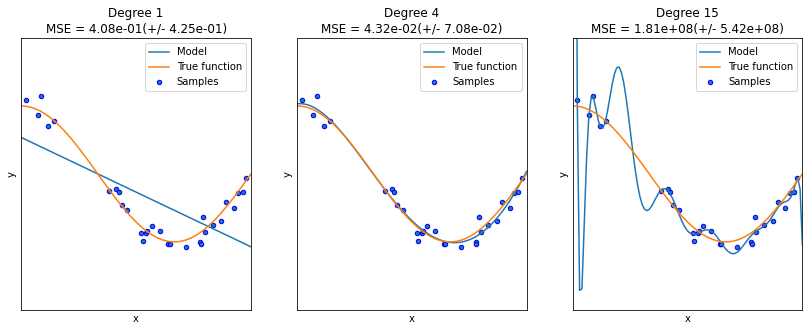

In [26]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수를 1, 4, 15로 각각 변화시키면서 비교한다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    #개별 degree 별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    #교차 검증으로 다항 회귀를 평가 
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나뉘 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교 
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    #실제값 곡선
    plt.plot(X_test, true_fun(X_test), '-', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()